#**How Does a Bike-Share Navigate Speedy Success?**
Google Data Analytics Professional Certificate Case Study

Hello, I recently finished the Google Data Analytics Professional Certificate program in Coursera. Although not required as part of this course, optional students are asked to do a case study in which they can demonstrate their data analysis skills. And this is the project I'm working on. I used python for this project and google colabs for visualization.




#**Background**

The marketing director of Cyclistic, a bike sharing company in Chicago, believes that the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members.



#**Data Source**
The team used Cyclistic’s 12-month historical trip data (from January 2021 to December 2021) to analyze and identify trends. The datasets were extracted from this website. 

This public data has been made available by Motivate International Inc, under this license.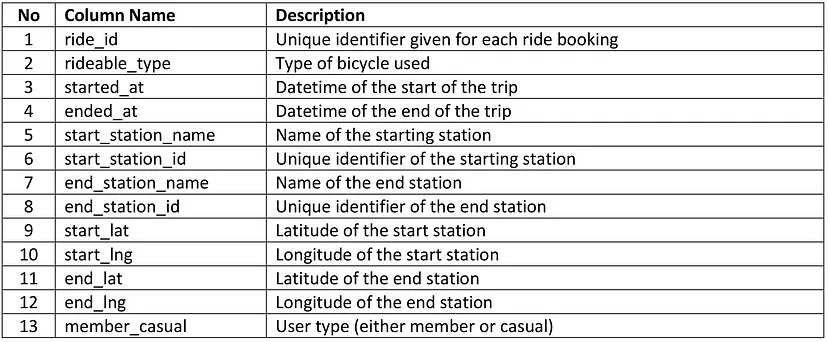

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime
from haversine import haversine
import datetime
import seaborn as sns
import random
import calendar


# Merging csv files from 2021-01 to 2021-12 in trip data folder
---



In [ ]:
path = "/content/gdrive/MyDrive/python/Trip_data"
all_files = glob.glob(path+"/*.csv")
all_files
li = []
for filename in all_files:
    df= pd.read_csv(filename,index_col=None, header=0)
    li.append(df)
    df=pd.concat(li, axis=0, ignore_index=True)
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.7200,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.6900,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.7000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.6900,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.7000,casual
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,NaN,NaN,41.900409,-87.696763,41.940000,-87.7100,casual
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,California Ave & Cortez St,17660,NaN,NaN,41.900391,-87.696757,41.900000,-87.7100,member
7,DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,California Ave & Cortez St,17660,NaN,NaN,41.900390,-87.696728,41.910000,-87.7000,member
8,C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,California Ave & Cortez St,17660,NaN,NaN,41.900306,-87.696796,41.900000,-87.7000,member
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.6722,member


#Missing Values

In [ ]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

#Total number of users in a year 5,595,063 

In [ ]:
df["member_casual"].value_counts().sum()

5595063

# During this 12-month period, 54% of users are members, while 45% are casual users.

In [ ]:
value_counts = df["member_casual"].value_counts()
value_counts

member    3066058
casual    2529005
Name: member_casual, dtype: int64

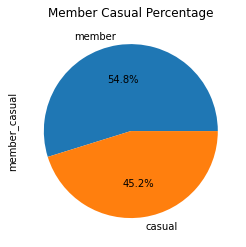

In [ ]:
value_counts = df["member_casual"].value_counts()
value_percentages = value_counts / value_counts.sum() * 100

value_percentages.plot.pie(autopct='%.1f%%')

plt.title("Member Casual Percentage")


plt.show()

# Graph of member and casual user numbers for each month for a 12-month period

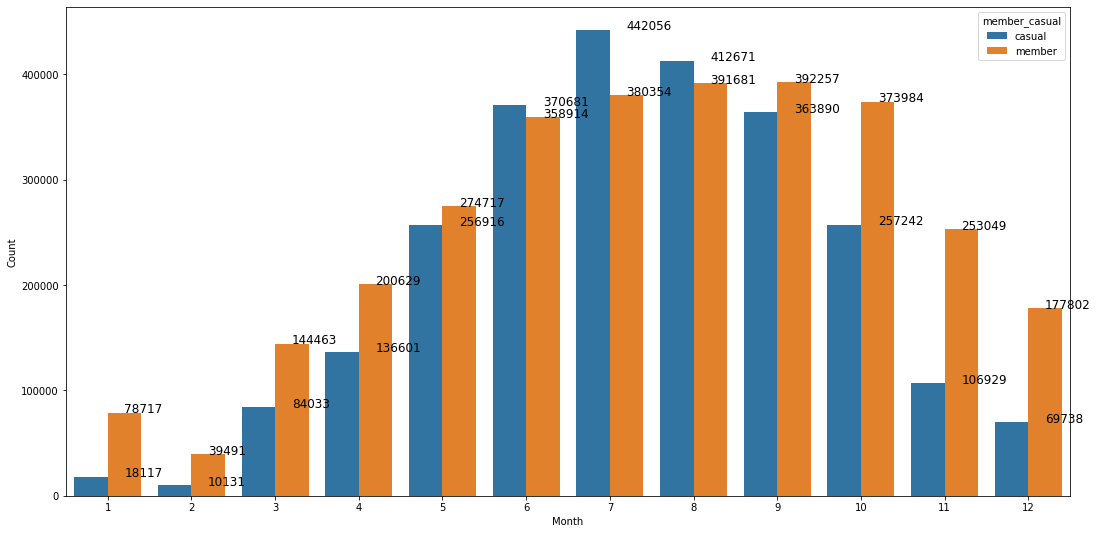

In [ ]:
df["started_at"]=pd.to_datetime(df["started_at"])
df["month"]= df["started_at"].dt.month
grouped= df.groupby(["month","member_casual"])["member_casual"].count().reset_index(name="count")

plt.figure(figsize=(18,9))
sns.barplot(x="month", y="count", hue="member_casual", data=grouped)
plt.ylabel("Count")
plt.xlabel("Month")

for i in range(grouped.shape[0]):
  month=grouped.iloc[i]["month"]
  count=grouped.iloc[i]["count"]
  member_casual=grouped.iloc[i]["member_casual"]
  plt.text(month-0.8 ,count, str(count),fontsize=12)
plt.show()  



# During the 12-month period, casual users use 32% more than annual members

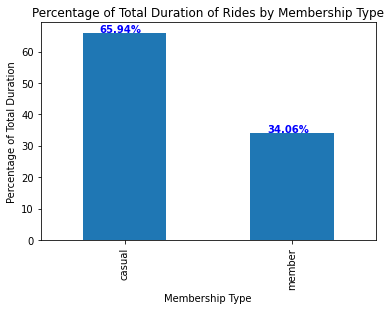

In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['duration'] = df['ended_at'] - df['started_at']
df['duration'] = df['duration'].dt.total_seconds() # Convert to days
grouped = df.groupby(['member_casual'])['duration'].sum()
total_duration = grouped.sum()
grouped = (grouped / total_duration) * 100

fig, ax = plt.subplots()
grouped.plot.bar(ax=ax)
plt.xlabel("Membership Type")
plt.ylabel("Percentage of Total Duration")
plt.title("Percentage of Total Duration of Rides by Membership Type")

for i, v in enumerate(grouped.values):
 ax.text(i-.15, v + 0.1, str(round(v, 2)) + '%', color='blue', fontweight='bold')

plt.show()

# When we look at the equal number of random users, casual users use almost 40% more than members.

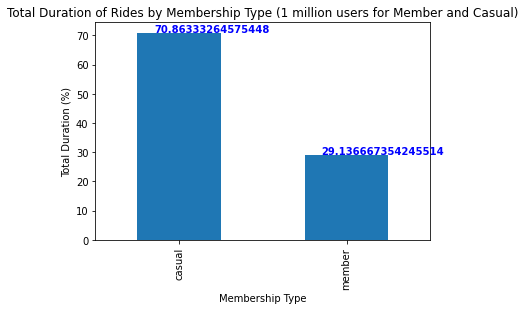

In [69]:
df_casual = df[df['member_casual'] == 'casual'].sample(100000)
df_member = df[df['member_casual'] == 'member'].sample(100000)

df_sample = pd.concat([df_casual, df_member])

df_sample['duration'] = df_sample['duration'] / df_sample['duration'].sum() * 100
grouped2 = df_sample.groupby(['member_casual'])['duration'].sum()

fig, ax = plt.subplots()
grouped2.plot.bar(ax=ax)
plt.xlabel("Membership Type")
plt.ylabel("Total Duration (%)")
plt.title("Total Duration of Rides by Membership Type (1 million users for Member and Casual)")

for i, v in enumerate(grouped2.values):
 ax.text(i-.15, v + 0.1, str(v), color='blue', fontweight='bold')

plt.show()







In [ ]:
df['start_lng'] = df['start_lng'].astype(float)
df['start_lat'] = df['start_lat'].astype(float)
df['end_lng'] = df['end_lng'].astype(float)
df['end_lat'] = df['end_lat'].astype(float)

df["distance_km"] = df.apply(lambda x: haversine((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])), axis=1) / 1000

In [ ]:
 df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,duration,distance_km
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,1,625.0,0.002242
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,1,244.0,0.000556
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,1,80.0,0.000280
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,1,702.0,0.002248
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,1,43.0,0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,12,1153.0,0.002608
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,12,421.0,0.000783
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,12,497.0,0.000878
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,12,853.0,0.001387


# Annual users travel 7% more distances than casual users

In [ ]:
df.groupby("member_casual")["distance_km"].sum()

member_casual
casual    5705.583575
member    6517.009649
Name: distance_km, dtype: float64

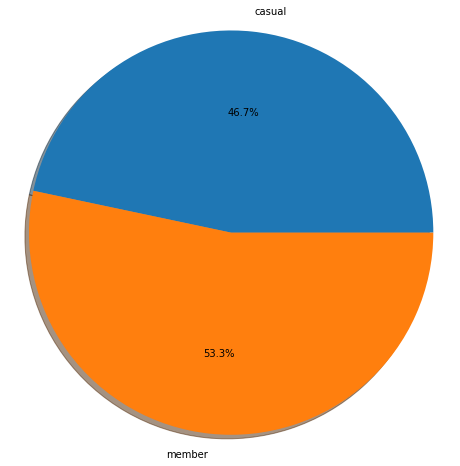

In [ ]:
grouped = df.groupby("member_casual")["distance_km"].sum()
grouped = (grouped / grouped.sum()) * 100

labels = grouped.index.tolist()
sizes = grouped.values.tolist()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



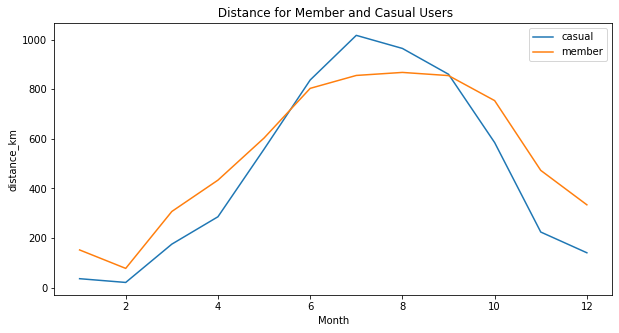

In [ ]:
grouped = df.groupby(["member_casual", "month"])["distance_km"].sum()
grouped = grouped.reset_index()

plt.figure(figsize=(10, 5))
for user_type in grouped['member_casual'].unique():
    data = grouped[grouped['member_casual'] == user_type]
    plt.plot(data['month'], data['distance_km'], label=user_type)

plt.xlabel("Month")
plt.ylabel("distance_km")
plt.title(" Distance for Member and Casual Users")
plt.legend()
plt.show()


# Number of Rides and Monthly Chart of Users by Bike Type

In [ ]:
df.groupby(["member_casual", "rideable_type"]).size().reset_index(name='counts')


,member_casual,rideable_type,counts
0,casual,classic_bike,1266657
1,casual,docked_bike,312342
2,casual,electric_bike,950006
3,member,classic_bike,1984371
4,member,docked_bike,1
5,member,electric_bike,1081686


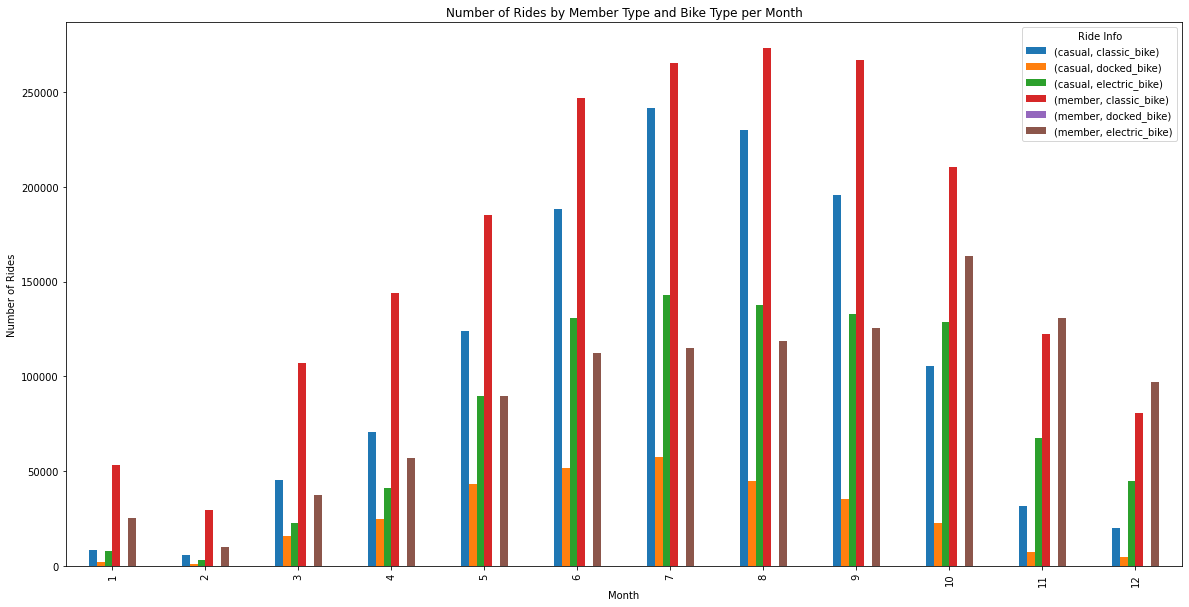

In [ ]:
df_grouped = df.groupby(["month", "member_casual", "rideable_type"]).size().reset_index(name='counts')
pivot_df = df_grouped.pivot(index='month', columns=('member_casual', 'rideable_type'), values='counts')

fig, ax = plt.subplots(figsize=(20, 10))
pivot_df.plot(kind='bar', ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides by Member Type and Bike Type per Month")
ax.legend(title="Ride Info", loc="upper right")
plt.show()

In [78]:
df.corr()


,start_lat,start_lng,end_lat,end_lng,month,duration,distance_km
start_lat,1.000000,-0.541817,0.884505,-0.487002,-0.035168,-0.008829,0.090143
start_lng,-0.541817,1.000000,-0.483507,0.771442,-0.042870,0.013872,-0.082348
end_lat,0.884505,-0.483507,1.000000,-0.540139,-0.036295,-0.006355,0.096987
end_lng,-0.487002,0.771442,-0.540139,1.000000,-0.042082,0.008753,-0.088573
month,-0.035168,-0.042870,-0.036295,-0.042082,1.000000,-0.013843,-0.012407
duration,-0.008829,0.013872,-0.006355,0.008753,-0.013843,1.000000,0.046837
distance_km,0.090143,-0.082348,0.096987,-0.088573,-0.012407,0.046837,1.000000


#Daily cycling statistics of users

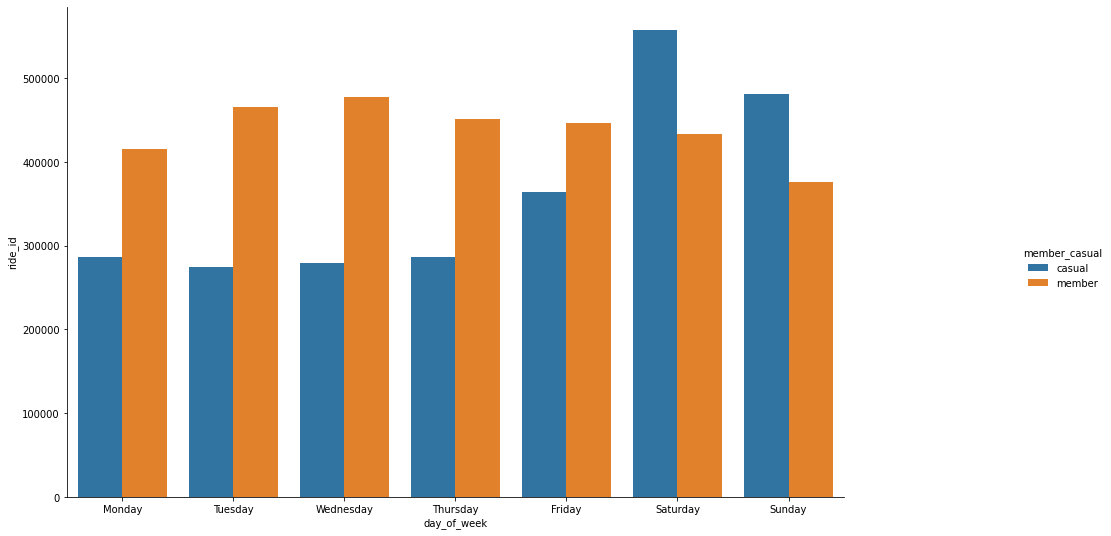

In [ ]:
## Convert started_at column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])

# Extract day of the week from started_at column
df['day_of_week'] = df['started_at'].dt.day_name()

# Group by day_of_week and member_casual and count the number of rides
grouped = df.groupby(['day_of_week', 'member_casual'])['ride_id'].count().reset_index()

# Reorder the days of the week to start from Monday
grouped['day_of_week'] = pd.Categorical(grouped['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
grouped.sort_values('day_of_week', inplace=True)

# Plot the grouped data using seaborn
sns.catplot(x='day_of_week', y='ride_id', hue='member_casual', data=grouped, kind='bar')
plt.gcf().set_size_inches(18, 8)

# Add labels for each bar


# Show the plot
plt.show()


#Top 5 Starting Stations

In [ ]:
casual_start_stations = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(5)


member_start_stations = df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(5)

print("Top 5 start stations for casual users:")
print(casual_start_stations)

print("\nTop 5 start stations for member users:")
print(member_start_stations)


Top 5 start stations for casual users:
Streeter Dr & Grand Ave    66360
Millennium Park            33590
Michigan Ave & Oak St      29781
Shedd Aquarium             23251
Theater on the Lake        21351
Name: start_station_name, dtype: int64

Top 5 start stations for member users:
Clark St & Elm St           24740
Wells St & Concord Ln       23718
Kingsbury St & Kinzie St    23565
Wells St & Elm St           21022
Dearborn St & Erie St       19585
Name: start_station_name, dtype: int64


#Top 5 Ending Stations

In [ ]:
casual_start_stations = df[df['member_casual'] == 'casual']['end_station_name'].value_counts().head(5)


member_start_stations = df[df['member_casual'] == 'member']['end_station_name'].value_counts().head(5)

print("Top 5 end stations for casual users:")
print(casual_start_stations)

print("\nTop 5 end stations for member users:")
print(member_start_stations)


Top 5 end stations for casual users:
Streeter Dr & Grand Ave    68677
Millennium Park            34565
Michigan Ave & Oak St      31193
Theater on the Lake        22760
Shedd Aquarium             21564
Name: end_station_name, dtype: int64

Top 5 end stations for member users:
Clark St & Elm St           24913
Wells St & Concord Ln       24393
Kingsbury St & Kinzie St    23647
Wells St & Elm St           21641
Dearborn St & Erie St       20303
Name: end_station_name, dtype: int64


#Conclusion

To guide the marketing campaign to convert casual riders into annual members, we now have some data driven insights on how casual riders and annual members use Cyclistic bikes differently. The key findings and my recommendations for the marketing campaign are as follows:





* There is not a big difference between the number of members and the number of daily users, they are almost equal. The firm should calculate whether it is more profitable when the number of users is equal or if one of the daily or annual user types is more. Accordingly, a repricing or membership system should be considered.

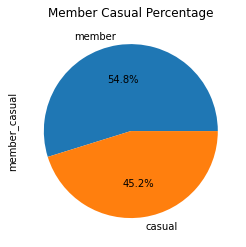

* When we look at the behavior of daily users by month, we see that they made a big jump in the 3rd quarter of the year, which means that daily users may be using the bike to spend more time and have fun when summer comes. The company can make more campaigns to convert casual to annual members during these months, exclusive to these users.





* When we look at those who have annual memberships, they also have less fluctuation compared to daily users, although there is an increase in the 3rd quarter of the year. Although the number of users with annual subscription type is higher than the number of daily users, they use this service for a shorter period of time compared to daily users in terms of usage time of this service. which means that annual members use this service for a specific purpose, for business, racing, etc. situations.(When we look at the equal number of users, this can be seen more clearly.)

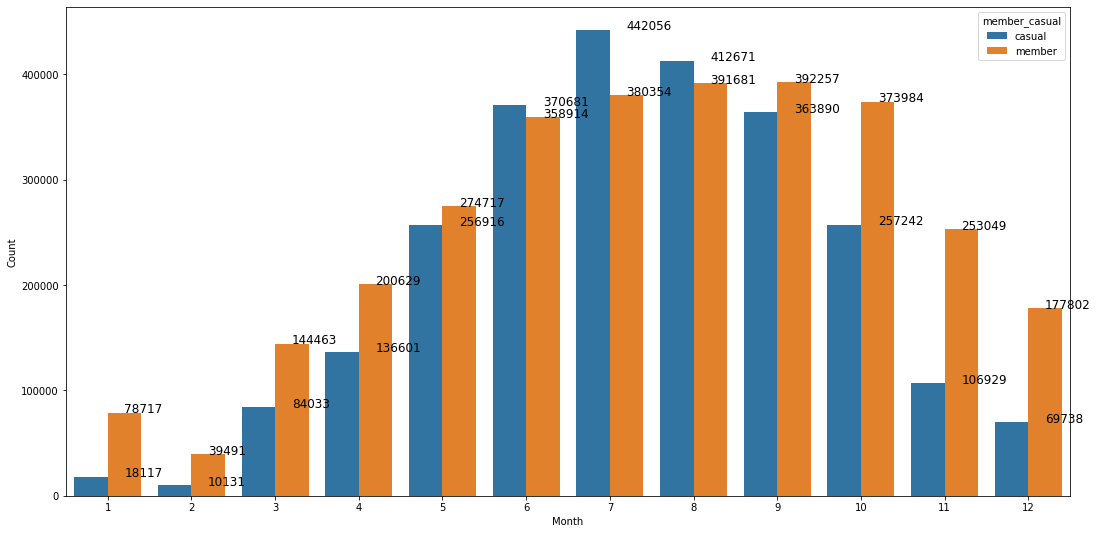


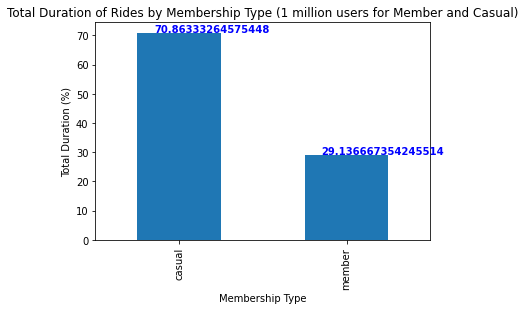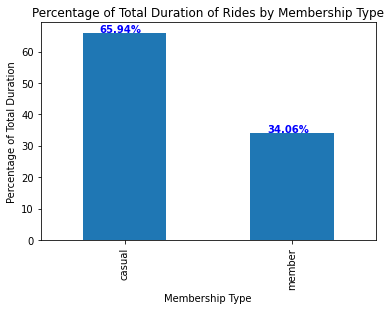

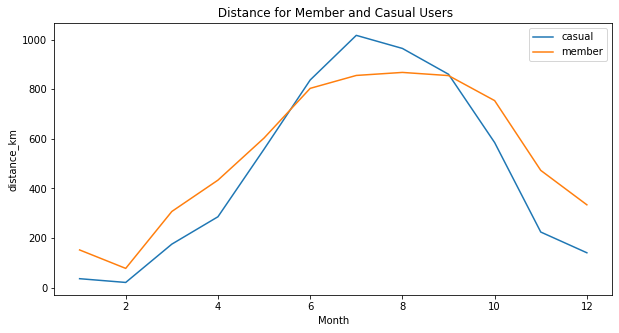


* When we look at bicycle types, we see that the classic bicycle type is used more compared to electric bicycles, if the company wants to increase the use of electric bicycles, it can increase the number of electric bicycle users with special campaigns.

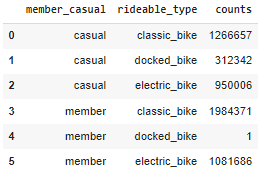




* When we look at the daily usage, there is no noticeable increase in the members, while the daily users increase towards the end of the week. This confirms that daily users use this service more on free days or when the weather is better. Different campaigns can be launched for daily users, such as special weekly or  5 day memberships for example.

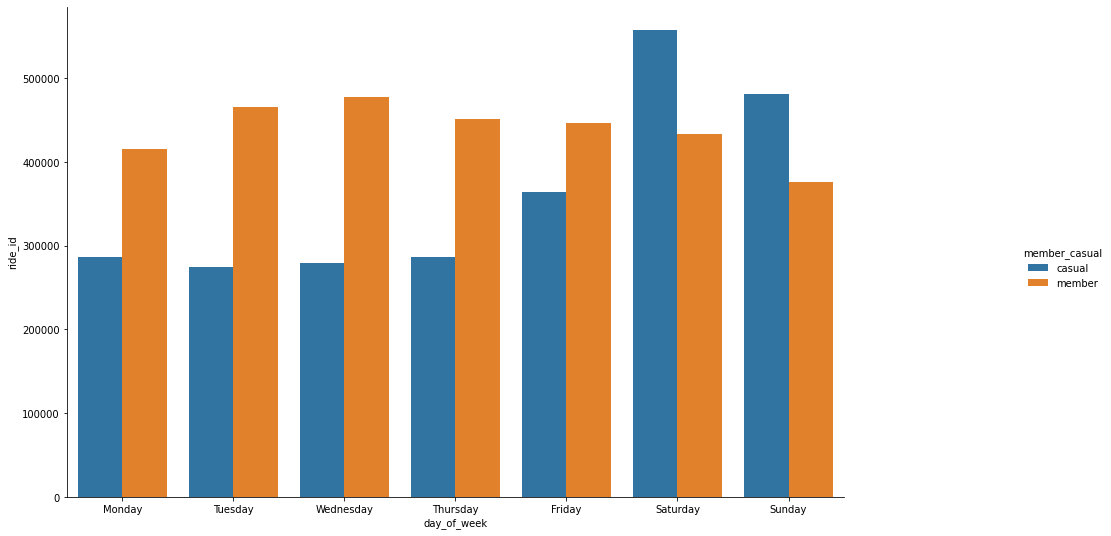

* When we look at the Top 5 start and end stations, both user types have mostly returned to the places they started, which shows us the location of the users in general, this service can be expanded more in these regions.

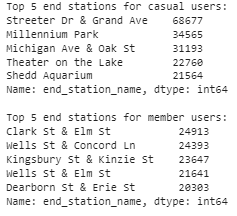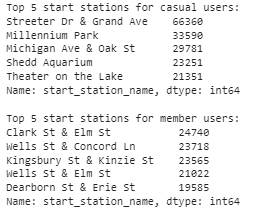




